# Translation from English to Norwegian

In [1]:
import sys
import torch
import pandas as pd
sys.path.append("..")
from translator import Translator

In [2]:
loss = pd.read_csv('loss.csv', header=0, index_col=0)
loss.plot(y="train_loss")
loss.plot(y="val_loss")

<Axes: >

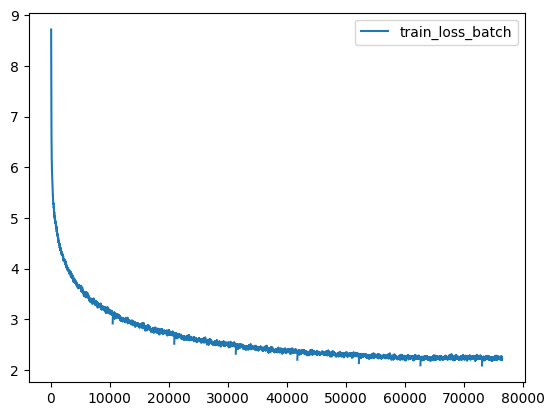

In [12]:
debug = pd.read_csv('debug.csv', header=0, usecols=["iteration", "train_loss_batch"])
debug.rolling(window=75).mean().plot(y="train_loss_batch")

In [3]:
prompts = [
    "Universe",
    "A chair.",
    "My book is on the table.",
    "I like sitting at school when working.",
    "By attending the physics-lectures I got sleepy.",
    "Who could possibly avoid death?",
    "Yes, well how do you, as an AI, handle such long inputs as this? Are you able to translate "
    "them? I have not looked in the dataset thoroughly enough to see wheter there are any long "
    "pairs."
]
model =  torch.load("./model-5.pth", map_location=torch.device('cpu'))
model.config.device = "cpu"

# Example translations from the untrained and checkpointed models

In [4]:
for prompt in prompts:
    print(f" \033[91m From:\033[0m {prompt}")
    print(f" \033[91m   To:\033[0m {model(prompt)}")
    print("-------") if prompt != prompts[-1] else None

  From: Universe
    To:  - Alle sammen.
-------
  From: A chair.
    To:  En stol.
-------
  From: My book is on the table.
    To:  Min bok er på bordet.
-------
  From: I like sitting at school when working.
    To:  Jeg liker å sitte på skolen når jeg jobber.
-------
  From: By attending the physics-lectures I got sleepy.
    To:  Ved å komme med fysikk-ene jeg fikk sove.
-------
  From: Who could possibly avoid death?
    To:  Hvem kan unngå døden?
-------
  From: Yes, well how do you, as an AI, handle such long inputs as this? Are you able to translate them? I have not looked in the dataset thoroughly enough to see wheter there are any long pairs.
    To:  - Hvordan kan du oversette dem?
